# Euler Bernoulli Beam "solver"

The Euler-Bernoulli equation describes the relationship between the beam's deflection and the applied load

$$\frac{d^2}{dx^2}\left(EI\frac{d^2w}{dx^2}\right) = q \enspace .$$

The curve $w(x)$ describes the delection of the beam at some point $x$, $q$ is a distributed load.

This equation cannot be solve in this form in Sympy. Nevertheless, we can "trick" it to do it for us. Let us rewrite the equation as two equations

$$\begin{align}
&-\frac{d^2 M}{dx^2} = q \enspace ,\\
&- EI\frac{d^2w}{dx^2} = \frac{M}{EI} \enspace ,
\end{align}$$

where $M$ is the bending moment in the beam. We can, then, solve the two equation as if they have source terms and then couple the two solutions.

The code below do this


In [23]:
from __future__ import division
from sympy import *
from sympy import init_printing
x = symbols('x')
E, I = symbols('E I', positive=True)
C1, C2, C3, C4 = symbols('C1 C2 C3 C4')
w, M, q, f = symbols('w M q f', cls=Function)
EI = symbols('EI', cls=Function, nonnegative=True)
init_printing()

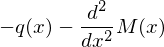

In [24]:
M_eq = -diff(M(x), x, 2) - q(x)

M_eq

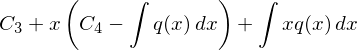

In [25]:
M_sol = dsolve(M_eq, M(x)).rhs.subs([(C1, C3), (C2, C4)])

M_sol

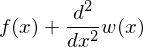

In [26]:
w_eq = f(x) + diff(w(x),x,2)
w_eq

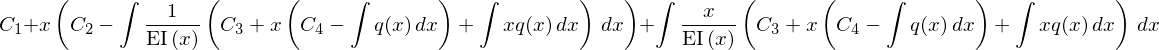

In [27]:
w_sol = dsolve(w_eq, w(x)).subs(f(x), M_sol/EI(x)).rhs

w_sol

We want to be sure that this solution is ok. We replaced known values for $E$, $I$ and $q$ to check it.

## Cantilever beam with end load

In [28]:
sub_list = [(q(x), 0), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [29]:
L, F = symbols('L F')
# Fixed end
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)
# Free end
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L) + F/(E*I)

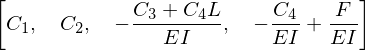

In [30]:
[bc_eq1, bc_eq2, bc_eq3, bc_eq4]

In [31]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])
constants

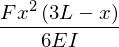

In [32]:
w_sol1.subs(constants).simplify()

## Cantilever beam with uniformly distributed load

In [33]:
sub_list = [(q(x), 1), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [34]:
L = symbols('L')
# Fixed end
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)
# Free end
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L)

In [35]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])

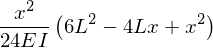

In [36]:
w_sol1.subs(constants).simplify()

## Cantilever beam with exponential loading

In [37]:
sub_list = [(q(x), exp(x)), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [38]:
print(w_sol1)

C1 + C3*x**2/(2*E*I) + C4*x**3/(3*E*I) + x*(C2 - C3*x/(E*I) - C4*x**2/(2*E*I) + exp(x)/(E*I)) + (-x + 1)*exp(x)/(E*I)


In [39]:
L = symbols('L')
# Fixed end
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)
# Free end
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L)

In [40]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])

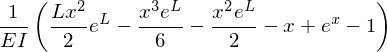

In [41]:
w_sol1.subs(constants).simplify()

## Load written as a Taylor series and constant EI

We can prove that the general function is written as

In [42]:
k = symbols('k', integer=True)
C = symbols('C1:4')
D = symbols('D', cls=Function)

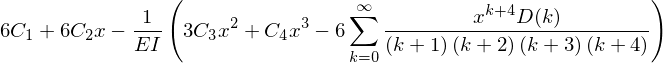

In [43]:
w = 6*(C1 + C2*x) - 1/(E*I)*(3*C3*x**2 + C4*x**3 -
                             6*Sum(D(k)*x**(k + 4)/((k + 1)*(k + 2)*(k + 3)*(k + 4)),(k, 0, oo)))

w

In [44]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()